In [1]:
%matplotlib inline
import os
from importlib import reload
import sys
sys.path.append('..')

from lid import demoutils, datautil, common, report

def method_report(setting_path, user_settings, df):
    reload(report)
    reporter = report.Report(setting_path, user_settings, df)
    reporter.voting_mean()
    reporter.voting_majority()
    reporter.train_process_plot()

/Users/a18180846/projects/voice/env/lib/python3.7/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Prepare test dataset

In [2]:
user_settings = {'store': "/Users/a18180846/projects/data"}
setting_path = r"../experiments/customcnn32mel512hop.yml"

In [3]:
reload(datautil)
val_df = datautil.load_validation_data(setting_path, user_settings)
val_df.head()

(2970, 7)
Columns Index(['path', 'label', 'mel_count', 'Y', 'fullpath', 'npy', 'mp3'], dtype='object')


,path,label,mel_count,Y,fullpath,npy,mp3
0,13070f84bcee7e0e7c95c22c8e42e4281d86b468f3e09a...,en,104,1,/Users/a18180846/projects/data/en/features_mel...,/Users/a18180846/projects/data/en/preprocess/1...,/Users/a18180846/projects/data/en/clips/13070f...
1,0453f3171ae9796724616ae2c0f70fa8a0637f344512f0...,en,41,1,/Users/a18180846/projects/data/en/features_mel...,/Users/a18180846/projects/data/en/preprocess/0...,/Users/a18180846/projects/data/en/clips/0453f3...
2,21c248d45e19fedee632e6d2ae40d830ff847bdaccfdf5...,en,83,1,/Users/a18180846/projects/data/en/features_mel...,/Users/a18180846/projects/data/en/preprocess/2...,/Users/a18180846/projects/data/en/clips/21c248...
3,070c38e0e4fed7961eee2804df26e26b2612a5fc2ebd42...,en,145,1,/Users/a18180846/projects/data/en/features_mel...,/Users/a18180846/projects/data/en/preprocess/0...,/Users/a18180846/projects/data/en/clips/070c38...
4,139c14a91872977338d5b454b57afb4ed709e70f570824...,en,93,1,/Users/a18180846/projects/data/en/features_mel...,/Users/a18180846/projects/data/en/preprocess/1...,/Users/a18180846/projects/data/en/clips/139c14...


In [4]:
# select N rows per label
N = 300
df = val_df.groupby('label', as_index=False).apply(lambda x: x.sample(N)).reset_index(drop=True)
df.label.value_counts()

en    300
de    300
ru    300
Name: label, dtype: int64

## Custom CNN

100%|██████████| 900/900 [00:30<00:00, 29.06it/s]


              precision    recall  f1-score   support

          ru       0.77      0.86      0.81       300
          en       0.84      0.58      0.69       300
          de       0.70      0.83      0.76       300

    accuracy                           0.76       900
   macro avg       0.77      0.76      0.75       900
weighted avg       0.77      0.76      0.75       900



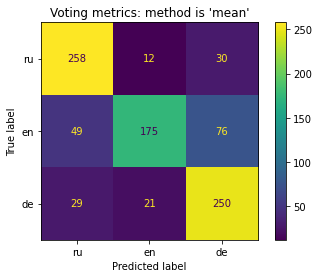

100%|██████████| 900/900 [00:29<00:00, 30.62it/s]


              precision    recall  f1-score   support

          ru       0.66      0.88      0.75       300
          en       0.81      0.51      0.63       300
          de       0.73      0.76      0.74       300

    accuracy                           0.71       900
   macro avg       0.73      0.71      0.71       900
weighted avg       0.73      0.71      0.71       900



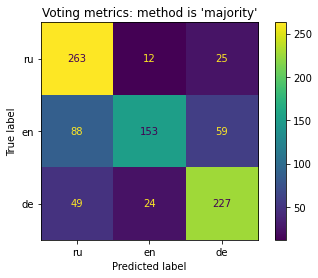

Loaded training metrics: Index(['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss',
       'voted_majority_acc', 'voted_mean_acc'],
      dtype='object')


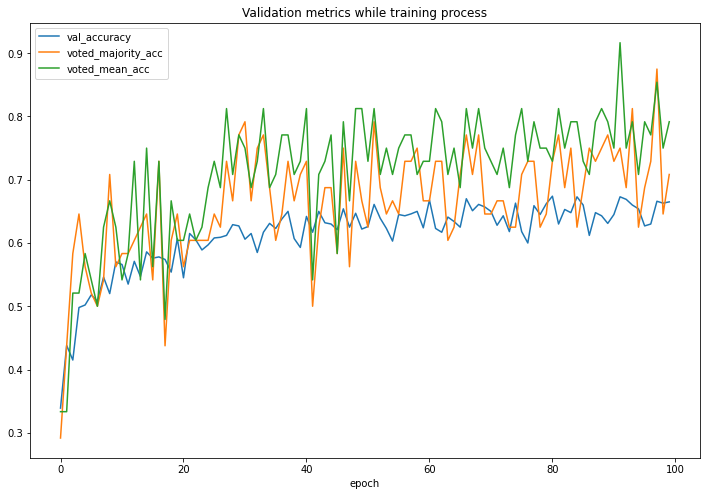

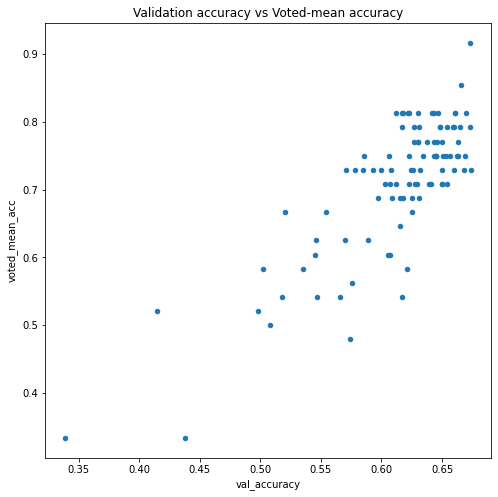

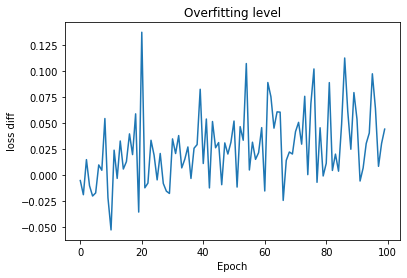

In [5]:
user_settings = {'vad_level': 1, 'noise_reduction': True,
                 'voted_seconds': 10, 'voting_overlap': 0.5, 'voting': 'mean',
                'store': "/Users/a18180846/projects/data"}
setting_path = r"../experiments/customcnn32mel512hop.yml"
method_report(setting_path, user_settings, df)

## D-CNN

100%|██████████| 900/900 [00:29<00:00, 30.49it/s]


              precision    recall  f1-score   support

          ru       0.80      0.67      0.73       300
          en       0.64      0.83      0.72       300
          de       0.76      0.66      0.71       300

    accuracy                           0.72       900
   macro avg       0.73      0.72      0.72       900
weighted avg       0.73      0.72      0.72       900



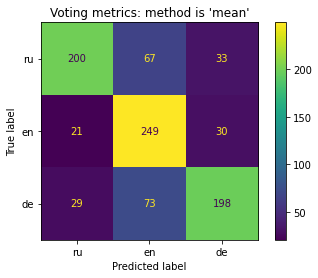

100%|██████████| 900/900 [00:28<00:00, 31.41it/s]


              precision    recall  f1-score   support

          ru       0.72      0.70      0.71       300
          en       0.64      0.81      0.72       300
          de       0.74      0.56      0.64       300

    accuracy                           0.69       900
   macro avg       0.70      0.69      0.69       900
weighted avg       0.70      0.69      0.69       900



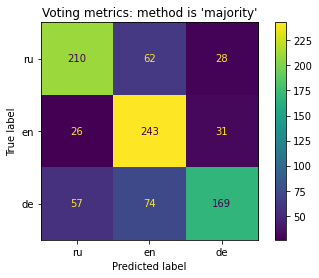

Loaded training metrics: Index(['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss',
       'voted_majority_acc', 'voted_mean_acc'],
      dtype='object')


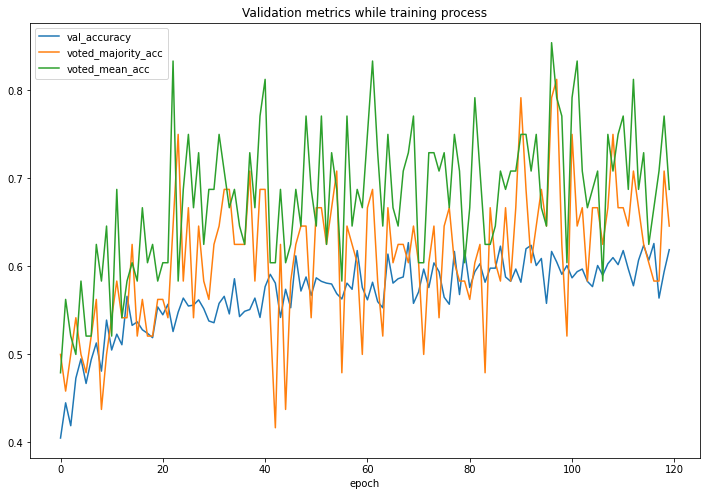

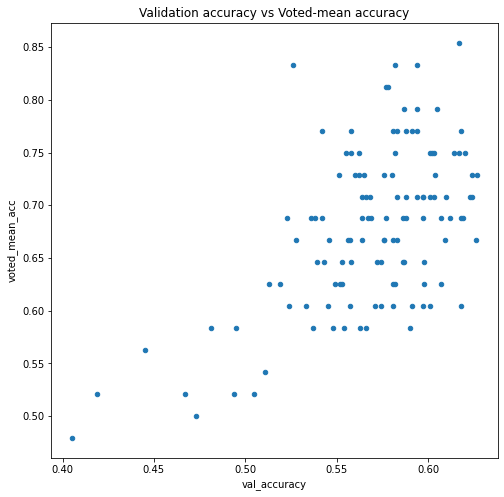

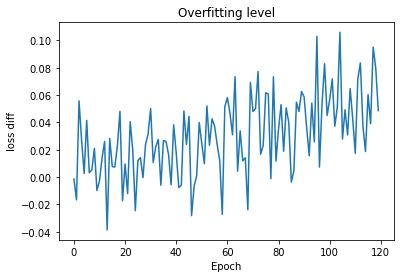

In [6]:
user_settings = {'vad_level': 1, 'noise_reduction': True,
                 'voted_seconds': 10, 'voting_overlap': 0.5, 'voting': 'mean',
                'store': "/Users/a18180846/projects/data"}
setting_path = r"../experiments/dcnn32mel512hop.yml"
method_report(setting_path, user_settings, df)

## LD-CNN

100%|██████████| 900/900 [00:27<00:00, 32.16it/s]


              precision    recall  f1-score   support

          ru       0.79      0.85      0.82       300
          en       0.85      0.63      0.72       300
          de       0.74      0.87      0.80       300

    accuracy                           0.78       900
   macro avg       0.79      0.78      0.78       900
weighted avg       0.79      0.78      0.78       900



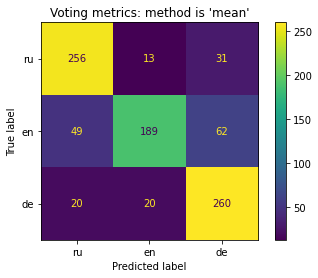

100%|██████████| 900/900 [00:28<00:00, 31.06it/s]


              precision    recall  f1-score   support

          ru       0.70      0.82      0.76       300
          en       0.78      0.62      0.69       300
          de       0.75      0.77      0.76       300

    accuracy                           0.74       900
   macro avg       0.74      0.74      0.74       900
weighted avg       0.74      0.74      0.74       900



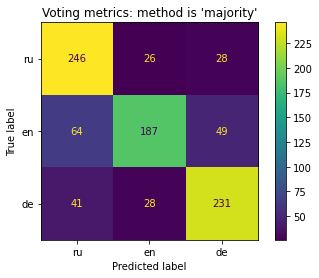

Loaded training metrics: Index(['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss',
       'voted_majority_acc', 'voted_mean_acc'],
      dtype='object')


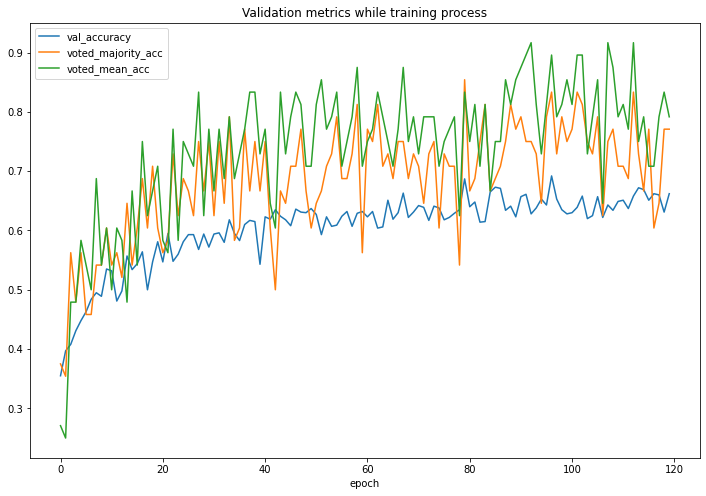

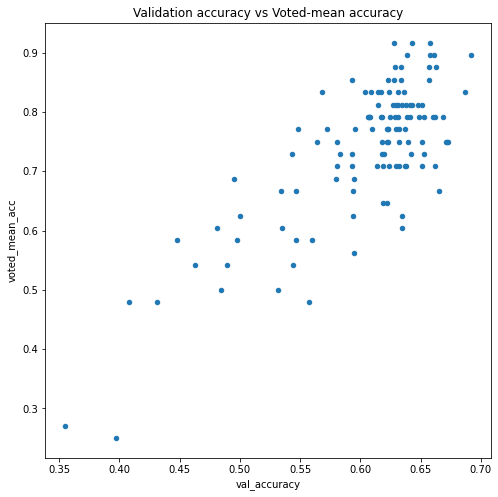

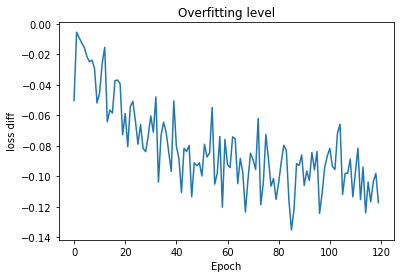

In [7]:
user_settings = {'vad_level': 1, 'noise_reduction': True,
                 'voted_seconds': 10, 'voting_overlap': 0.5, 'voting': 'mean',
                'store': "/Users/a18180846/projects/data"}
setting_path = r"../experiments/ldcnn32mel512hop.yml"
method_report(setting_path, user_settings, df)

## LSTM over frame sequence

100%|██████████| 900/900 [00:30<00:00, 29.16it/s]


              precision    recall  f1-score   support

          ru       0.50      0.43      0.46       300
          en       0.47      0.56      0.51       300
          de       0.53      0.49      0.51       300

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.49       900
weighted avg       0.50      0.50      0.49       900



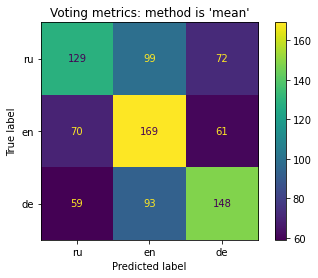

100%|██████████| 900/900 [00:29<00:00, 30.11it/s]


              precision    recall  f1-score   support

          ru       0.46      0.58      0.51       300
          en       0.47      0.47      0.47       300
          de       0.55      0.42      0.47       300

    accuracy                           0.49       900
   macro avg       0.49      0.49      0.49       900
weighted avg       0.49      0.49      0.49       900



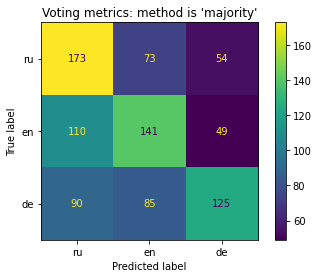

Loaded training metrics: Index(['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss',
       'voted_majority_acc', 'voted_mean_acc'],
      dtype='object')


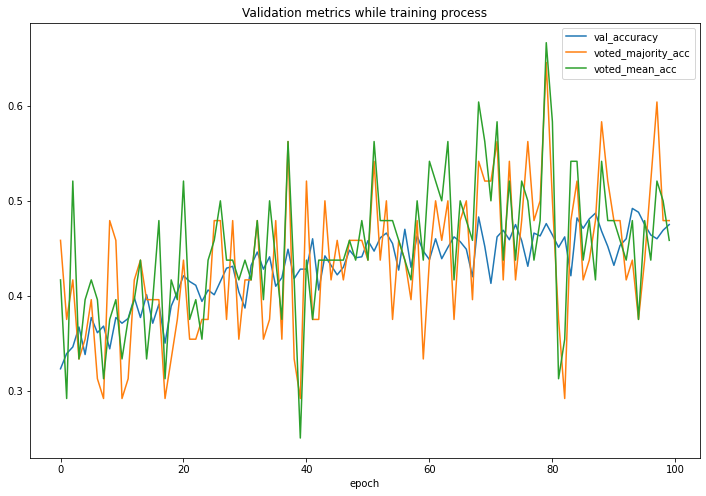

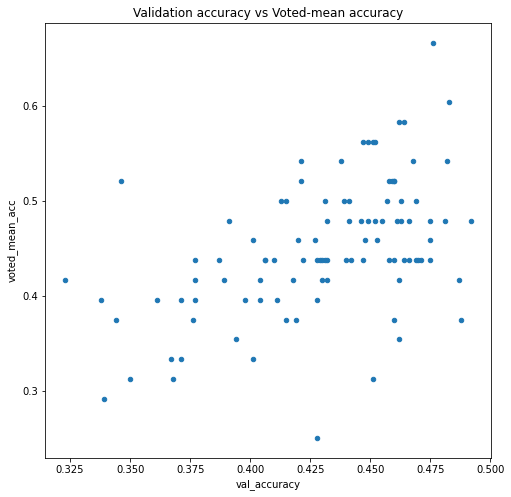

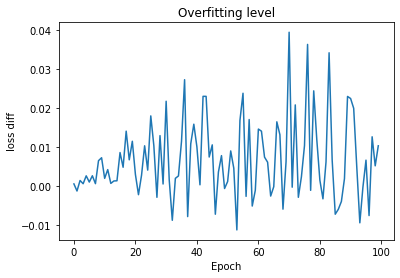

In [9]:
user_settings = {'vad_level': 1, 'noise_reduction': True,
                 'voted_seconds': 10, 'voting_overlap': 0.5, 'voting': 'mean',
                'store': "/Users/a18180846/projects/data"}
setting_path = r"../experiments/recurrent32mel512hop.yml"
method_report(setting_path, user_settings, df)